<a href="https://colab.research.google.com/github/ELBrown11/predicting-compensation/blob/main/Copy_of_Copy_of_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Employee Data to Predict Base Salary**

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import pandas
import pandas as pd

## **Data Background**

This data comes from [Kaggle](https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries). The data, which consists of 62,000+ records and 29 columns, was scraped from [levels.fyi](http://levels.fyi). Levels is a website where employee of top companies, including FAANG (Facebook, Amazon, Apple, Netflix, Google) companies, share employee data including compensation and demographic information. The data also includes several one hot encoded columns for specific levels of education and racial identities likely created by whomever scraped this data.



In [ ]:
filename2 = '/content/drive/MyDrive/Coding Dojo Bootcamp/Levels_Fyi_Salary_Data.csv'
df = pd.read_csv(filename2)


print(f'Data table contains {df.shape[0]} rows and {df.shape[1]} columns')
print('\n')
df.head()

Data table contains 62642 rows and 29 columns




,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


## **Hypothesis:** years of experience, years at company, education and gender would have strong correlations with and effects on base salary.



## **Goal of this Project:** use feature data and regression modeling  to predict base salary.



## **Exploring the Contents of Data in Each Column**

In [ ]:
#contents of tag column
df.tag.value_counts()

Full Stack                                  11382
Distributed Systems (Back-End)              10838
API Development (Back-End)                   6277
ML / AI                                      4204
Web Development (Front-End)                  2971
                                            ...  
Developer Relations / Developer Advocacy        1
compensation                                    1
Kernel, Storage                                 1
Device Modeling                                 1
Sales/Pre-Sales                                 1
Name: tag, Length: 3058, dtype: int64

----------------
- contains data about certain skills that the employee has
---------------

In [ ]:
#contents of otherdetails
df.otherdetails.value_counts()

Masters                                                                            3983
Title: Software Engineer                                                           1453
Race: Asian, Academic Level: Master’s degree                                       1213
Race: White, Academic Level: Bachelor’s degree                                     1075
Race: Asian, Academic Level: Bachelor’s degree                                      977
                                                                                   ... 
Title: Systems Software Engineer, Academic Level: Master’s degree                     1
Title: Yolo, Race: Hispanic / Latino, Academic Level: High school or equivalent       1
Remote, Title: Front End Engineer I                                                   1
Title: Sr Technical Product Manager, Academic Level: Master’s degree                  1
Negotiated twice.                                                                     1
Name: otherdetails, Length: 1284

--------------
- contains metadata, some rows include education, title, race
- the data each row contains varies (12841 unique values)
- this row contains data that is already in other columns therefore it can be dropped

--------------



In [ ]:
df.cityid.value_counts()

11527    8701
7419     6796
10182    4562
11521    2649
7322     2275
         ... 
12943       1
16508       1
12402       1
10257       1
36994       1
Name: cityid, Length: 1045, dtype: int64

In [ ]:
df.dmaid.value_counts()

807.0    20400
819.0    12343
0.0       9826
501.0     5156
506.0     1773
         ...  
643.0        1
537.0        1
734.0        1
576.0        1
540.0        1
Name: dmaid, Length: 149, dtype: int64

In [ ]:
df.rowNumber.value_counts()

4094     1
533      1
12819    1
14866    1
8721     1
        ..
34042    1
40185    1
38136    1
60663    1
2049     1
Name: rowNumber, Length: 62642, dtype: int64

---------------
- `cityid`, `dmaid` and `rowNumber` columns contain data that doesn't give much insight so these can be dropped
---------------

|Column Names | Description of Data |
|:--------|:--------------------|
|timestamp| date that employee submitted data|
|company| name of company where employee works|
|level| level of seniority in position/job title|
|title| job title|
|totalyearlycompensation| total yearly earnings in usd|
|location| location of the job|
|yearsofexperience| number of years of experience employee has|
|yearsatcompany| number of years with the company|
|tag| metadata on skills|
|basesalary| yearly earnings not including stocks or bonus|
|stockgrantvalue| amount of stocks or grants earned in usd|
|bonus| amount earned via bonus in usd|
|otherdetails| contains metadata about employee|
|cityid| ?|
|dmaid| ? |
|rowNumber| row number|
|Masters_Degree| ohe* masters degree data, does this person have this degree, where 1 is yes and 0 is no|
|Bachelors_Degree| ohe* bachelors degree data, does this person have this degree, where 1 is yes and 0 is no|
|Doctorate_Degree| ohe* doctorate degree data, does this person have this degree, where 1 is yes and 0 is no|
|Highschool| ohe* high school data, does this person have this level of education, where 1 is yes and 0 is no|
|Some_College| ohe* some college data, does this person have this level of education, where 1 is yes and 0 is no|
|Race_Asian| ohe* asian race data, does this person have idenitify as this race, if yes 1 if no 0|
|Race_White| ohe* white race data, does this person have idenitify as this race, if yes 1 if no 0|
|Race_Two_Or_More|ohe* two or more race data, does this person have idenitify as this race, if yes 1 if no 0|
|Race_Black|ohe* black race data, does this person have idenitify as this race, if yes 1 if no 0|
|Race_Hispanic|ohe* hispanic race data, does this person have idenitify as this race, if yes 1 if no 0|
|Race| complete list of race data|
|Education| complete list of education data|

****ohe = one hot encoded***

In [ ]:
df.gender.value_counts()

Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

- here we see a few things...
  - the gender column has a lot of missing data
  - gender columns has an incorrect value which can be changed to the mode of this column
  - also gender is not binary here

In [ ]:
#for loop that find that incorrect record then replaces it with the most frequent
#there's a break because there's only one of these values and a lot of data to loop through
for i in range(0, len(df)):
  gender_mode = df.gender.mode()[0]
  if (df['gender'][i] == 'Title: Senior Software Engineer'):
    df['gender'] = df['gender'].replace('Title: Senior Software Engineer',gender_mode)
    break

In [ ]:
#to check that the loop worked correctly
df.gender.value_counts()

Male      35703
Female     6999
Other       400
Name: gender, dtype: int64

## **Dropping Irelevent Data**

- dropping this columns because they contain data with no valuable insights and/or they don't make sense as a feature of basesalary

In [ ]:
#totaling the education values
a = df.Masters_Degree.sum()
b = df.Bachelors_Degree.sum()
c = df.Doctorate_Degree.sum()
d = df.Highschool.sum()
e = df.Some_College.sum()
print(f'total of all ohe education data: {a+b+c+d+e}')
print(f'Education column total contains {(~df.Education.isnull()).sum()} non-nulls')

total of all ohe education data: 30474
Education column total contains 30370 non-nulls


In [ ]:
#totaling the race values
f = df.Race_Asian.sum()
g = df.Race_Black.sum()
h = df.Race_Hispanic.sum()
i = df.Race_Two_Or_More.sum()
j = df.Race_White.sum()
print(f'total of all ohe race data: {f+g+h+i+j}')
print(f'Race column total contains {(~df.Race.isnull()).sum()} non-nulls')

total of all ohe race data: 22428
Race column total contains 22427 non-nulls


> - when comparing the ohe columns to the columns containing the same info they have about that same amount of missing data
- because there is so much missing data, these columns won't give clear information about the relationship between education and base salary or race and base salary


In [ ]:
df2= df.drop(columns=['otherdetails','dmaid','rowNumber','cityid','Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College','Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic','timestamp','totalyearlycompensation','stockgrantvalue','bonus'])
print(f'Data table contains {df2.shape[0]} rows and {df2.shape[1]} columns')
print('\n')
df2.head()

Data table contains 62642 rows and 11 columns




,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,gender,Race,Education
0,Oracle,L3,Product Manager,"Redwood City, CA",1.5,1.5,NaN,107000.0,NaN,NaN,NaN
1,eBay,SE 2,Software Engineer,"San Francisco, CA",5.0,3.0,NaN,0.0,NaN,NaN,NaN
2,Amazon,L7,Product Manager,"Seattle, WA",8.0,0.0,NaN,155000.0,NaN,NaN,NaN
3,Apple,M1,Software Engineering Manager,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,NaN,NaN,NaN
4,Microsoft,60,Software Engineer,"Mountain View, CA",5.0,3.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            62637 non-null  object 
 1   level              62523 non-null  object 
 2   title              62642 non-null  object 
 3   location           62642 non-null  object 
 4   yearsofexperience  62642 non-null  float64
 5   yearsatcompany     62642 non-null  float64
 6   tag                61788 non-null  object 
 7   basesalary         62642 non-null  float64
 8   gender             43102 non-null  object 
 9   Race               22427 non-null  object 
 10  Education          30370 non-null  object 
dtypes: float64(3), object(8)
memory usage: 5.3+ MB


In [ ]:
df2.basesalary.value_counts()

160000.0    2806
0.0         2304
150000.0    2265
130000.0    1721
140000.0    1684
            ... 
655000.0       1
620000.0       1
138814.0       1
640000.0       1
102200.0       1
Name: basesalary, Length: 482, dtype: int64

In [ ]:
for i in range(109,len(df2)):
  median_bs = df2.basesalary.median()
  if (df2['basesalary'][i] == 0):
    df2['basesalary'] = df2['basesalary'].replace(0,median_bs)

In [ ]:
df2.basesalary.value_counts()

140000.0    3988
160000.0    2806
150000.0    2265
130000.0    1721
120000.0    1680
            ... 
655000.0       1
102200.0       1
620000.0       1
138814.0       1
138890.0       1
Name: basesalary, Length: 481, dtype: int64

In [ ]:
#library for missing data graphics
import missingno as msno

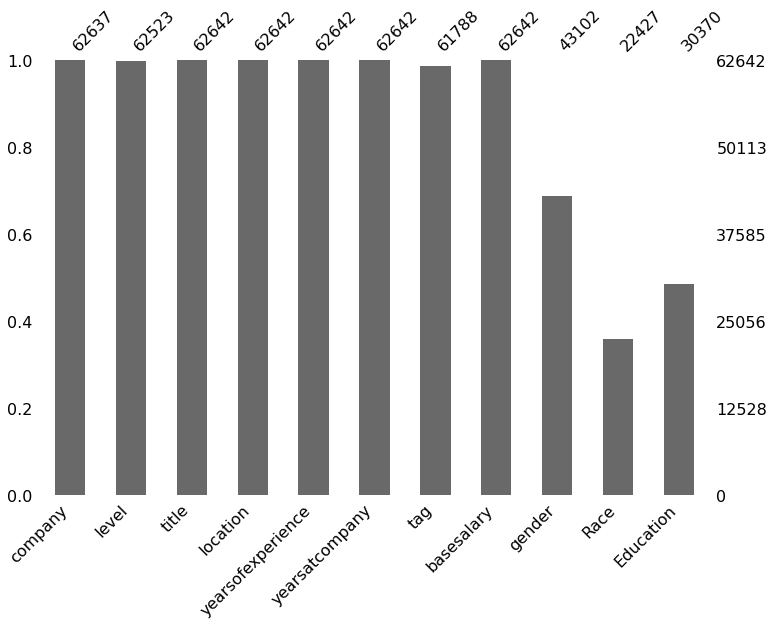

In [ ]:
msno.bar(df2, figsize=(12,8));

> <mark>*graph gives a clear picture of which columns have missing data and how much data is missing*</mark>

------------
## **Missing Data**
- **5** missing in `company` column
  - can impute with mode
- **119** missing in `level` column
  - can impute with mode
- **19540** missing in `gender` column
  - can impute with mode
- **40215** missing in `Race`column
  - impute with mode and ohe
- **32272** missing in `Education` column
 - impute with mode and ohe
- technically there is missing `basesalary` column
  - there are a number of `0` values which should be imputed with mean

--------------

## **Duplicated Data**

In [ ]:
print(f'{df2.duplicated().sum()} duplicates')

934 duplicates


In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
print(f'Now there are {df2.duplicated().sum()} duplicates')

Now there are 0 duplicates


## **Exploratory Data Visualizations**

> Indented block



In [ ]:
#import visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#make visuals for targets and features
#heatmap
corr = df2.corr()
corr.style.background_gradient()


,yearsofexperience,yearsatcompany,basesalary
yearsofexperience,1.000000,0.520272,0.422054
yearsatcompany,0.520272,1.000000,0.177238
basesalary,0.422054,0.177238,1.000000


In [ ]:
df2.location.value_counts()

Seattle, WA               8413
San Francisco, CA         6734
New York, NY              4483
Redmond, WA               2533
Mountain View, CA         2238
                          ... 
Yangon, YA, Burma            1
Hawaiian Gardens, CA         1
Peachtree City, GA           1
Bielefeld, NW, Germany       1
Dayton, OH                   1
Name: location, Length: 1050, dtype: int64

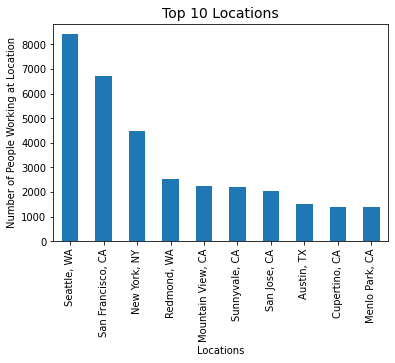

In [ ]:
df2.location.value_counts()[:10].plot(kind='bar');
plt.title('Top 10 Locations', fontsize=14)
plt.xlabel('Locations')
plt.ylabel('Number of People Working at Location');

In [ ]:
df2.title.value_counts()

Software Engineer               40459
Product Manager                  4636
Software Engineering Manager     3526
Data Scientist                   2552
Hardware Engineer                2182
Product Designer                 1507
Technical Program Manager        1377
Solution Architect               1145
Management Consultant             973
Business Analyst                  879
Marketing                         710
Mechanical Engineer               487
Sales                             460
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64

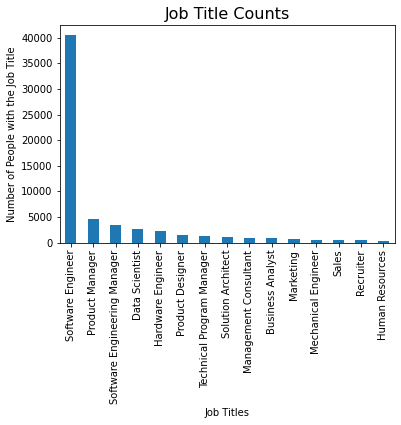

In [ ]:
df2.title.value_counts().plot(kind='bar')
plt.title('Job Title Counts', fontsize=16)
plt.xlabel('Job Titles')
plt.ylabel('Number of People with the Job Title');

> ### **Additional Dataframe** 
created an additional dataframe which contains data with the 25 highest total yearly compensations

In [ ]:
#records for 25 highest totalyearlycompensation
top_25 = df2.sort_values('basesalary', ascending=False)[:25]
top_25

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,gender,Race,Education
62351,Microsoft,64,Product Manager,"Redmond, WA",13.0,13.0,NaN,1659870.0,NaN,NaN,NaN
61851,Squarespace,Senior I,Software Engineer,"New York, NY",7.0,7.0,API Development (Back-End),1620000.0,Male,NaN,NaN
45054,PwC,Partner / Principal,Management Consultant,"Raleigh, NC",22.0,4.0,"Cloud, IoT",900000.0,Male,Asian,Master's Degree
56175,Netflix,Senior Software Engineer,Software Engineer,"Los Gatos, CA",19.0,8.0,Platform,893000.0,Male,White,Bachelor's Degree
57701,Netflix,Senior Software Engineer,Software Engineer,"Los Gatos, CA",15.0,7.0,Video,861000.0,Male,White,Bachelor's Degree
61967,Microsoft,80,Software Engineering Manager,"Redmond, WA",24.0,8.0,ML / AI,850000.0,Male,NaN,NaN
56529,Netflix,Senior Software Engineer,Software Engineer,"Los Gatos, CA",20.0,6.0,Full Stack,840000.0,NaN,NaN,NaN
16640,Netflix,Director,Product Manager,"Los Altos, CA",20.0,2.0,NaN,800000.0,NaN,NaN,Master's Degree
37462,Netflix,Manager,Software Engineering Manager,"Los Gatos, CA",8.0,3.0,API Development (Back-End),800000.0,Male,Asian,Bachelor's Degree
36746,Netflix,Senior Software Engineer,Software Engineer,"Los Gatos, CA",8.0,5.0,Distributed Systems (Back-End),800000.0,Male,NaN,Bachelor's Degree


In [ ]:
top_25.company.value_counts()

Netflix              18
Microsoft             2
IBM                   1
Squarespace           1
PwC                   1
HERE Technologies     1
Brex                  1
Name: company, dtype: int64

> - companies where the top earners (via total yearly compensation) work

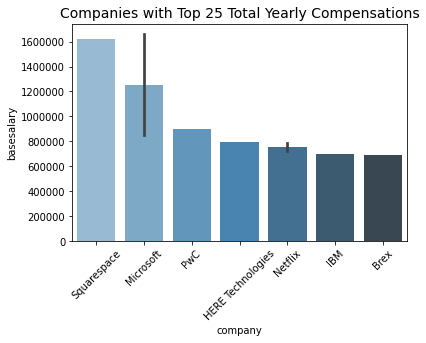

In [ ]:
companies = top_25.groupby('company').mean().sort_values(by='basesalary', ascending=False).reset_index().company
sns.barplot(x='company', y='basesalary',data=top_25,order=companies, palette='Blues_d')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45);
plt.title('Companies with Top 25 Total Yearly Compensations', fontsize=14);

In [ ]:
top_25.yearsofexperience.value_counts()

20.0    4
15.0    4
8.0     3
18.0    2
10.0    2
9.0     2
7.0     2
13.0    2
14.0    1
24.0    1
19.0    1
22.0    1
Name: yearsofexperience, dtype: int64

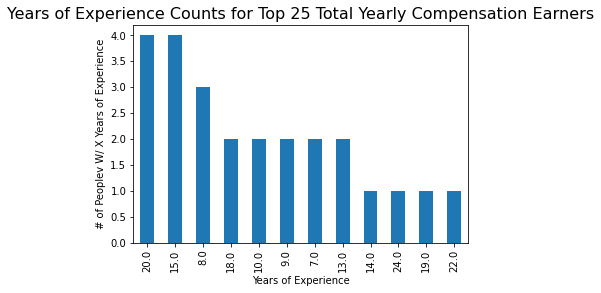

In [ ]:
top_25.yearsofexperience.value_counts().plot(kind='bar')
plt.title('Years of Experience Counts for Top 25 Total Yearly Compensation Earners', fontsize=16)
plt.xlabel('Years of Experience')
plt.ylabel('# of Peoplev W/ X Years of Experience');

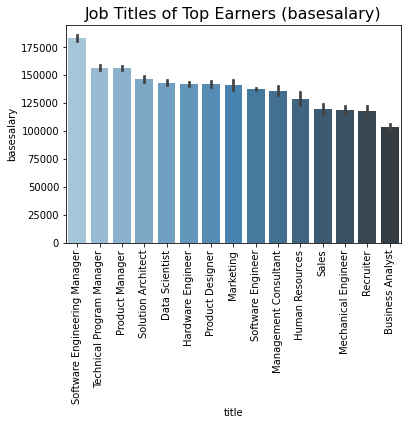

In [ ]:
titles = df2.groupby('title').mean().sort_values(by='basesalary', ascending=False).reset_index().title
sns.barplot(x='title', y='basesalary', data=df2, order=titles, palette='Blues_d')
plt.xticks(rotation=90);
plt.title('Job Titles of Top Earners (basesalary)', fontsize=16);

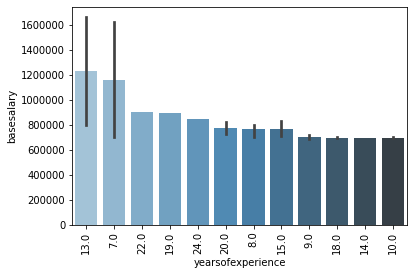

In [ ]:
years = top_25.groupby('yearsofexperience').mean().sort_values(by='basesalary', ascending=False).reset_index().yearsofexperience

sns.barplot(x='yearsofexperience', y='basesalary',data=top_25,order=years, palette='Blues_d')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90);

## **Preprocessing and Modelling**

In [ ]:
#import machine learning libraries and methods
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import numpy as np
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline


In [ ]:
#assign target and features
X = df2.drop(columns='basesalary')
y = df2['basesalary']

In [ ]:
#create train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#instatiate the selectors for numerical and categorical
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)


numeric columns are ['yearsofexperience', 'yearsatcompany']
categorical columns are ['company', 'level', 'title', 'location', 'tag', 'gender', 'Race', 'Education']


### **Preprocessing Pipelines**

In [ ]:
#instantiate imputer with mean strategy
mean_imputer = SimpleImputer(strategy='mean')
#instantiate imputer with most frequent strategy
freq_imputer = SimpleImputer(strategy='most_frequent')
#instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')


#match transformation to type of column
num_tuple = (mean_imputer, num_selector)
ohe_tuple = (ohe_encoder, cat_selector)
cat_pipe = make_pipeline(freq_imputer,ohe_encoder)
cat_tuple = (cat_pipe, cat_selector)

column_transformer = make_column_transformer(num_tuple,cat_tuple)

### **Linear Regression Model**

In [ ]:
#instantiate linear regression
lin_reg = LinearRegression()
#instatiate linear regression pipeline
linreg_pipe = make_pipeline(column_transformer, lin_reg)
#fit pipeline one the training data
linreg_pipe.fit(X_train, y_train)

#analysis of linear regression
linreg_score_train = r2_score(y_train, linreg_pipe.predict(X_train))
linreg_score_test = r2_score(y_test, linreg_pipe.predict(X_test))
print(f'Train R2 score (linear regression): {linreg_score_train}')
print(f'Test R2 score (linear regression): {linreg_score_test}')
print(f'Difference {linreg_score_train - linreg_score_test:.2f}')


Train R2 score (linear regression): 0.8323794950160586
Test R2 score (linear regression): 0.6981634495917013
Difference 0.13


#### **More Linear Regression Model Analysis**

In [ ]:
#test and train predictions
linreg_test_preds = linreg_pipe.predict(X_test)
linreg_train_preds = linreg_pipe.predict(X_train)

#mean absolute errors for test and train
MAE_linreg_test = mean_absolute_error(y_test,linreg_test_preds)
MAE_linreg_train = mean_absolute_error(y_train,linreg_train_preds)

#RMSE for test and train
RSME_linreg_test = np.sqrt(mean_squared_error(y_test, linreg_test_preds))
RSME_linreg_train = np.sqrt(mean_squared_error(y_train, linreg_train_preds))

print(f'Linear Regression MAE (test): {MAE_linreg_test}')
print(f'Linear Regression MAE (train): {MAE_linreg_train}')
print(f'Linear Regression RMSE (test): {RSME_linreg_test}')
print(f'Linear Regression RMSE (train): {RSME_linreg_train}')

Linear Regression MAE (test): 17307.783674004935
Linear Regression MAE (train): 13561.102673757847
Linear Regression RMSE (test): 30478.70331293259
Linear Regression RMSE (train): 22706.51409188063


### **Decision Trees Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#insantiate decision tree
dectree = DecisionTreeRegressor(random_state=42)

#decision tree pipeline
dectree_pipe = make_pipeline(column_transformer, dectree)

#fit decision tree
dectree_pipe.fit(X_train, y_train)


#decision tree analysis
dectree_score_train = r2_score(y_train, dectree_pipe.predict(X_train))
dectree_score_test = r2_score(y_test, dectree_pipe.predict(X_test))
print(f'Train R2 score (decision tree): {dectree_score_train}')
print(f'Test R2 score (decision tree): {dectree_score_test}')
print(f'Difference {dectree_score_train - dectree_score_test:.2f}')

Train R2 score (decision tree): 0.9975491457793987
Test R2 score (decision tree): 0.5553280447764557
Difference 0.44


#### **More Decision Tree Model Analysis**

In [ ]:
#test and train predictions
dectree_test_preds = dectree_pipe.predict(X_test)
dectree_train_preds = dectree_pipe.predict(X_train)

#mean absolute errors for test and train
MAE_dectree_test = mean_absolute_error(y_test,dectree_test_preds)
MAE_dectree_train = mean_absolute_error(y_train,dectree_train_preds)

#RMSE for test and train
RSME_dectree_test = np.sqrt(mean_squared_error(y_test, dectree_test_preds))
RSME_dectree_train = np.sqrt(mean_squared_error(y_train, dectree_train_preds))

print(f'Decision Tree MAE (test): {MAE_dectree_test}')
print(f'Decision Tree MAE (train): {MAE_dectree_train}')
print(f'Decision Tree RMSE (test): {RSME_dectree_test}')
print(f'Decision Tree RMSE (train): {RSME_dectree_train}')

Decision Tree MAE (test): 22250.127503087806
Decision Tree MAE (train): 428.8361129573734
Decision Tree RMSE (test): 36993.92757886453
Decision Tree RMSE (train): 2745.652901000469


### **Bagged Trees Model**

In [ ]:
#import bagged tree
from sklearn.ensemble import BaggingRegressor
#instantiate bagged tree
bagreg = BaggingRegressor(random_state=42)
#bagged pipeline
bagreg_pipe = make_pipeline(column_transformer, bagreg)
#fit pipeline
bagreg_pipe.fit(X_train,y_train)

bagreg_score_train = r2_score(y_train, bagreg_pipe.predict(X_train))
bagreg_score_test = r2_score(y_test, bagreg_pipe.predict(X_test))
print(f'Train R2 score (bagged trees): {bagreg_score_train}')
print(f'Test R2 score (bagged trees): {bagreg_score_test}')
print(f'Difference {bagreg_score_train - bagreg_score_test:.2f}')

Train R2 score (bagged trees): 0.9513111969355109
Test R2 score (bagged trees): 0.6816490308266459
Difference 0.27


#### **More Bagged Trees Model Analysis**

In [ ]:
#test and train predictions
bagreg_test_preds = bagreg_pipe.predict(X_test)
bagreg_train_preds = bagreg_pipe.predict(X_train)

#mean absolute errors for test and train
MAE_bagreg_test = mean_absolute_error(y_test,bagreg_test_preds)
MAE_bagreg_train = mean_absolute_error(y_train,bagreg_train_preds)

#RMSE for test and train
RSME_bagreg_test = np.sqrt(mean_squared_error(y_test, bagreg_test_preds))
RSME_bagreg_train = np.sqrt(mean_squared_error(y_train, bagreg_train_preds))

print(f'Bagged Tree MAE (test): {MAE_bagreg_test}')
print(f'Bagged Tree MAE (train): {MAE_bagreg_train}')
print(f'Bagged Tree RMSE (test): {RSME_bagreg_test}')
print(f'Bagged Tree RMSE (train): {RSME_bagreg_train}')

Bagged Tree MAE (test): 18516.159613964708
Bagged Tree MAE (train): 7297.525728716271
Bagged Tree RMSE (test): 31301.392631477996
Bagged Tree RMSE (train): 12237.746230184192


In [ ]:
print(f'Difference between Random Forest Test score and Bagged Trees Test Score: {0.903726156640484-0.9006363840648496:.3f}')

Difference between Random Forest Test score and Bagged Trees Test Score: 0.003


> While Random Forest modelling has the best test r2 score it is only by about .003 but running the Random Forest takes a significantly longer amount of time (almost 40 mins versus the 2 mins than bagged trees takes). So the production model we will be using and hyperparameter tuning is the Bagged Tree model to improve R2 score and other metrics.


## Resource for Hyperparameter Tuning

- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
bagreg = BaggingRegressor(random_state=42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(bagreg.get_params())

Parameters currently in use:

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


> - this shows that parameters of our currrent model which give a starting point for hyperparameter tuning

In [ ]:

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
# Number of trees in random forest
n_estimators = list(range(5,55,5))
# Number of features to consider at every split
max_features = list(range(1,15))
# Method of selecting samples for training each tree
bootstrap = [True, False]
#method of fitting new estimator or reusing
warm_start = [True,False]
#method of 
oob_score = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'warm_start': warm_start,
               'bootstrap': bootstrap}

##param_grid = {
    ##'max_depth': [10, 20, None],
    ##'max_features': [2, 3,'auto'],
    ##'min_samples_leaf': [1, 4, 5],
    ##'min_samples_split': [2, 3, 6],
    ##'n_estimators': [50, 100, 150, 250]
#}

#}
# Create a based model
bagreg_improved = BaggingRegressor(random_state=42)# Instantiate the grid search model
grid_search = GridSearchCV(estimator = bagreg_improved, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
pipe_bagreg_improved = make_pipeline(column_transformer, grid_search)
# Fit the grid search to the data
pipe_bagreg_improved.fit(X_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 560 candidates, totalling 1680 fits


In [ ]:
bagreg_best = BaggingRegressor(bootstrap=True, max_features=5, n_estimators=50, warm_start=True)

In [ ]:
pipe_bagreg_best = make_pipeline(column_transformer, bagreg_best)
pipe_bagreg_best.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f28a85f2d90>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f28a88b12d0>)])),
         

In [ ]:
print(f'Train R2 score (best bagging tree): {r2_score(y_train, pipe_bagreg_best.predict(X_train))}')
print(f'Test R2 score (best bagged tree): {r2_score(y_test, pipe_bagreg_best.predict(X_test))}')

Train R2 score (best bagging tree): 0.0010970794218267965
Test R2 score (best bagged tree): 0.0008418262615130789


In [ ]:
best_pred_train = pipe_bagreg_best.predict(X_train)
best_pred_test = pipe_bagreg_best.predict(X_test)
MAE_bagregBest_test = mean_absolute_error(y_test,best_pred_test)
MAE_bagregBest_train = mean_absolute_error(y_train,best_pred_train)

print(f'Bagged Tree MAE (test): {MAE_bagregBest_test}')
print(f'Bagged Tree MAE (train): {MAE_bagregBest_train}')

Bagged Tree MAE (test): 38243.56254902005
Bagged Tree MAE (train): 38342.79870466092
